# Background

Links:
- [ALE Plot Paper](https://arxiv.org/abs/1612.08468)
- [Interpretable ML - Accumulated Local Effects (ALE) Plots](https://christophm.github.io/interpretable-ml-book/ale.html)
- [ALEPython](https://github.com/blent-ai/ALEPython) 

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

from alepython import ale_plot
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

plt.style.use("../style.mplstyle")

## Load Data 

In [2]:
data = pd.read_csv("../data/cardio.csv", sep=";", index_col=0)
data = data[(data["ap_hi"] < 300) & (data["ap_lo"] < 300)].sample(5000, random_state=42)
X, y = data.iloc[:, :-1], data.iloc[:, -1].values
print(f"Number of records         : {X.shape[0]}")
print(f"Number of features        : {X.shape[1]}")
print(f"Count of positive outcomes: {sum(y)} ({sum(y)/len(y)*100:.1f}%)")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
data.sample(10)

Number of records         : 5000
Number of features        : 11
Count of positive outcomes: 2507 (50.1%)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
19610,16043,1,160,62.0,120,80,1,1,0,1,1,0
26680,23494,1,162,60.0,130,90,2,1,0,0,0,1
23178,18722,1,159,77.0,100,60,2,1,0,0,0,1
92848,22469,2,180,100.0,120,80,1,1,1,1,1,0
26016,19983,1,160,60.0,130,90,1,1,0,0,1,0
18320,16911,2,173,83.0,100,70,1,1,0,0,1,0
44531,21934,1,158,78.0,130,80,1,1,0,0,1,0
17224,20362,1,157,67.0,90,50,1,1,0,0,1,1
53728,16038,1,156,60.0,120,80,1,1,0,0,1,1


## Train LightGBM Model

In [3]:
m = LGBMClassifier(random_state=42)
m.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [4]:
print(roc_auc_score(y_test, m.predict(X_test)))
fpr, tpr, _ = roc_curve(y_test, m.predict_proba(X_test)[:, 1])

0.7292124053593779


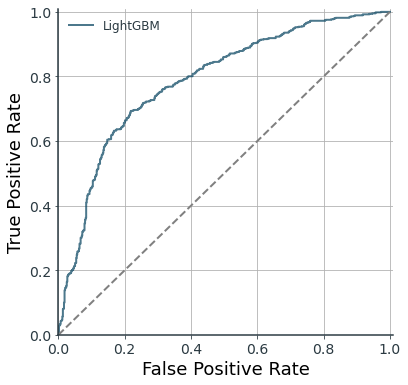

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label="LightGBM", alpha=0.7)
ax.plot([0, 1], [0, 1], linestyle="--", c="grey")
ax.set_xlim([0, 1.01])
ax.set_ylim([0, 1.01])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
ax.grid()

In [6]:
df = pd.DataFrame()
df["feat"] = X_train.columns
df["imp"] = m.feature_importances_
df = df.sort_values("imp", ascending=False).set_index("feat")
df

,imp
feat,
age,993
weight,701
height,506
ap_hi,248
ap_lo,164
cholesterol,111
gluc,91
gender,71
active,48


## ALE plots

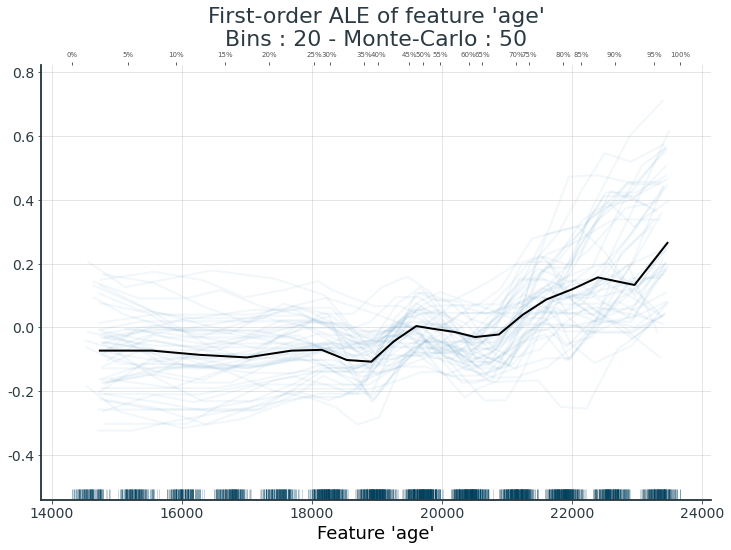

In [7]:
mpl.rc("figure", figsize=(12, 8))
ale_plot(m, X_train, "age", monte_carlo=True, bins=20, rugplot_lim=10000);

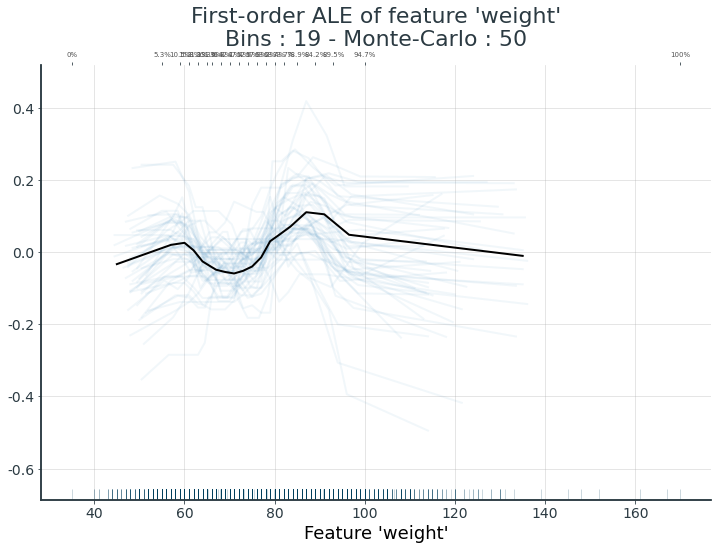

In [8]:
mpl.rc("figure", figsize=(12, 8))
ale_plot(m, X_train, "weight", monte_carlo=True, bins=20, rugplot_lim=10000);

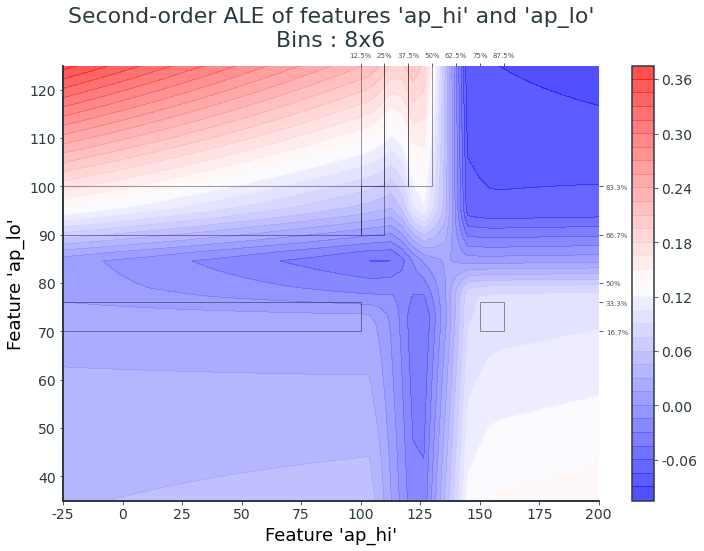

In [9]:
mpl.rc("figure", figsize=(12, 8))
ale_plot(m, X_train, ["ap_hi", "ap_lo"], monte_carlo=True, bins=20, rugplot_lim=10000);

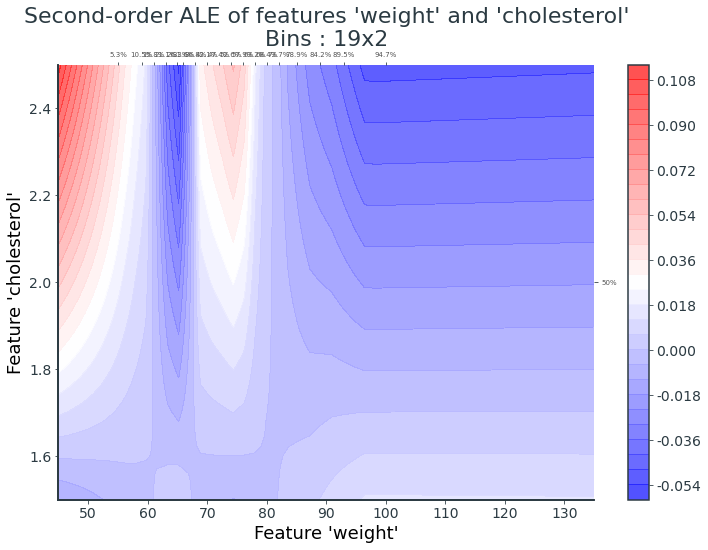

In [10]:
mpl.rc("figure", figsize=(12, 8))
ale_plot(m, X_train, ["weight", "cholesterol"], monte_carlo=True, bins=20, rugplot_lim=10000);